# Data Preprocessing

## 데이터 및 라이브러리 다운로드

In [ ]:
# Download Medical Cost Personal dataset
!gdown "https://drive.google.com/uc?id=169VGktQUtoNEkFFmXqSbL6ktcbpeMGb9"

# Filename: insurance.csv
# COLUMNS: age | sex | bmi | children | smoker | region | charges (7)

Downloading...
From: https://drive.google.com/uc?id=169VGktQUtoNEkFFmXqSbL6ktcbpeMGb9
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 64.4MB/s]


In [ ]:
# Library


# for mathmatical calculation
import numpy as np
# for dataframe
import pandas as pd
# for coloring maps
from matplotlib import colormaps

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# for preprocessing
from sklearn.preprocessing import StandardScaler

# for label encoding
from sklearn.preprocessing import LabelEncoder

# for data split
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/insurance.csv')

## 데이터 크기, 유형, 범위 알아보기 (개괄)

In [ ]:
# dataset 크기 알아보기
df.shape

# 1338개의 data, 7개의 columns

(1338, 7)

In [ ]:
# 색을 이용하여 data 분포를 쉽게 알아보기
df.tail().style.background_gradient(cmap="YlGnBu")

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.970000,3,no,northwest,10600.548300
1334,18,female,31.920000,0,no,northeast,2205.980800
1335,18,female,36.850000,0,no,southeast,1629.833500
1336,21,female,25.800000,0,no,southwest,2007.945000
1337,61,female,29.070000,0,yes,northwest,29141.360300


In [ ]:
# dataset의 data type을 포함한 정보 알아보기
df.info()

# categorical variables : (nominal) sex, children, smoker, region
# quantative variables : (discrete) age, / (continuous) bmi, charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# dataset의 값 개수(count), mean, 표준편차(std), minimum, maximum, 백분위수 한눈에 보기
df.describe().style.background_gradient(cmap="YlGnBu")

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 결측값 제거 및 데이터 시각화

### 결측값 제거

In [ ]:
# invalid value 찾기
duplicate = df.duplicated()
print(duplicate.sum())

# 1개의 invalid value

1


In [ ]:
# invalid value 제거
df.drop_duplicates(inplace=True)

In [ ]:
# invalid value 제거 확인
duplicate = df.duplicated()
print(duplicate.sum())

0


In [ ]:
# missing value 찾기
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null.style.background_gradient(cmap="YlGnBu")

# missing value (Null) 없음

,Null Values,Percentage Null Values
age,0,0.000000
sex,0,0.000000
bmi,0,0.000000
children,0,0.000000
smoker,0,0.000000
region,0,0.000000
charges,0,0.000000


In [ ]:
# outlier 찾기
cat_features = [col for col in df.columns if df[col].dtype=='O']
num_features = [col for col in df.columns if df[col].dtype!='O']

In [ ]:
cat_data=df[cat_features]
cat_data.head()


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [ ]:
num_data = df[num_features]
num_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


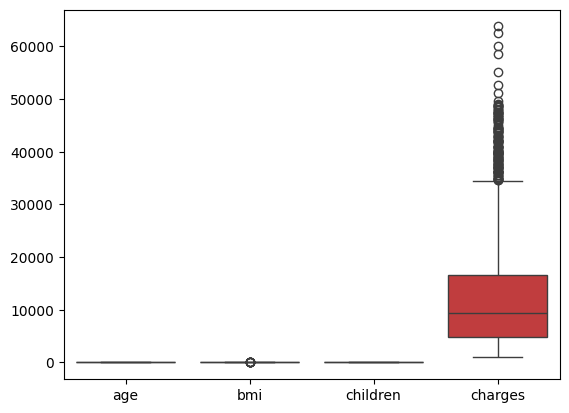

In [ ]:
fig, ax = plt.subplots()
bp = sns.boxplot(data = num_data)

In [ ]:
# 조금 더 자세히 outlier를 분석하기 위해 standard scaler 이용
scaler = StandardScaler()
scaled_array = scaler.fit_transform(num_data)

scaled_data = pd.DataFrame(scaled_array, columns = num_data.columns)
scaled_data.head()

,age,bmi,children,charges
0,-1.440418,-0.453160,-0.909234,0.297857
1,-1.511647,0.509422,-0.079442,-0.954381
2,-0.799350,0.383155,1.580143,-0.729373
3,-0.443201,-1.305052,-0.909234,0.719104
4,-0.514431,-0.292456,-0.909234,-0.777499


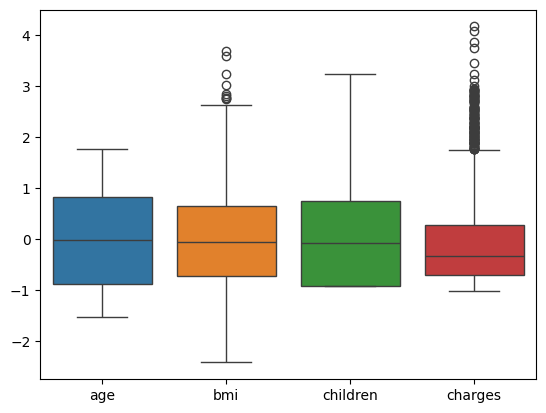

In [ ]:
fig, ax = plt.subplots()
bp = sns.boxplot(data = scaled_data)

# bmi, charges columns에서 outlier 발견

In [ ]:
# outliers 제거
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 - Q1

num_data = num_data[~ ((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR))).any(axis=1)]
cat_data = cat_data.loc[num_data.index]

p_data = pd.concat([cat_data, num_data], axis=1)
p_data.shape

# outliers 제거 후 1192개의 데이터 남음

(1192, 7)

### 데이터 분포

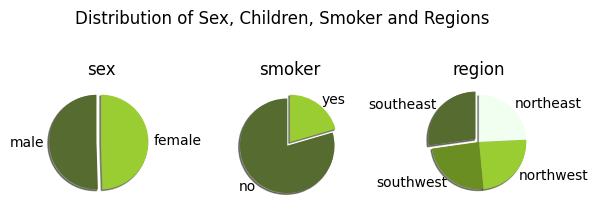

In [ ]:
# 7개의 columns 중, categorical variables (sex, smoker, region)을 먼저 시각화

plt.subplot(1, 3, 1)
plt.pie(df['sex'].value_counts().values,
        labels = df['sex'].value_counts().index,
        colors = ['darkolivegreen','yellowgreen'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0])
plt.title('sex')

plt.subplot(1, 3, 2)
plt.pie(df['smoker'].value_counts().values,
        labels = df['smoker'].value_counts().index,
        colors = ['darkolivegreen','yellowgreen'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0])
plt.subplots_adjust(wspace = 0.6)
plt.title('smoker')

plt.subplot(1, 3, 3)
plt.pie(df['region'].value_counts().values,
        labels = df['region'].value_counts().index,
        colors = ['darkolivegreen','olivedrab','yellowgreen','honeydew'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0, 0, 0])
plt.title('region')

plt.suptitle('Distribution of Sex, Children, Smoker and Regions')
plt.subplots_adjust(top = 1.3)
plt.show()

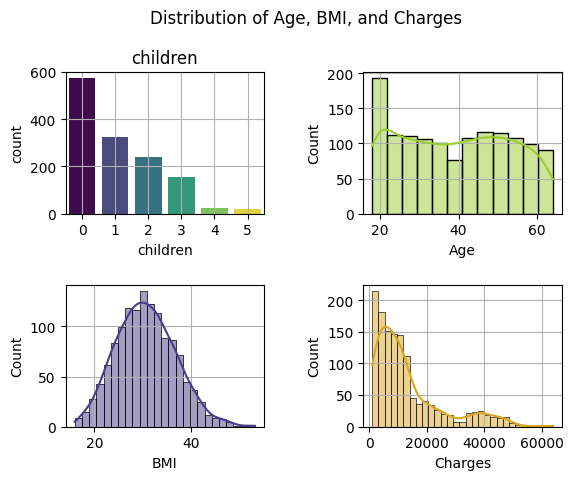

In [ ]:
# 7개의 columns의 나머지 quantative variables (children, age, bmi, charges) 시각화

plt.subplot(2, 2, 1)
sns.countplot(data = df, x = df['children'], hue = df['children'], palette = 'viridis', legend = False)
plt.grid()
plt.subplots_adjust(top = 0.85, wspace = 0.5, hspace = 0.5)
plt.title('children')

plt.subplot(2, 2, 2)
sns.histplot(df['age'], kde = True, color = 'yellowgreen')
plt.xlabel('Age')
plt.grid()

plt.subplot(2, 2, 3)
sns.histplot(df['bmi'], kde = True, color = 'darkslateblue')
plt.xlabel('BMI')
plt.grid()

plt.subplot(2, 2, 4)
sns.histplot(df['charges'], kde = True, color = 'goldenrod')
plt.xlabel('Charges')
plt.grid()

plt.suptitle('Distribution of Age, BMI, and Charges')
plt.show()

### charges(target variable) 중심의 데이터 연관성 분석

In [ ]:
# charges & age
px.scatter(df, y = 'charges',
           x = 'age',
           trendline = 'ols', template = 'plotly_dark')

# age 높을수록 charges 값도 높아진다.

In [ ]:
# charges & sex
px.violin(df, y="charges", color = "sex", violinmode= 'overlay',
          points='all', box = False, template = 'plotly_dark')

# sex(male)이 평균적으로 더 charges가 높은 경향

In [ ]:
# charges & BMI
px.scatter(df,
              x="bmi",
              y="charges",
              size="age",
              color="sex",
              hover_name="charges", template = 'plotly_dark')

# BMI 30~40일 때 charges가 비교적 높은 경향

In [ ]:
# charges & children
px.box(x = df['children'], y = df['charges'], notched=True, template = 'plotly_dark')

# 뚜렷한 연관성을 보이지 않음

In [ ]:
# charges & smoker
px.scatter(df, y="charges", facet_col="smoker", color="sex", trendline="ols",
           trendline_scope="overall", trendline_color_override="white", template = 'plotly_dark')

# smoker(yes)가 charges 더 높은 경향

In [ ]:
# charges & region
px.bar_polar(df, r="charges", theta="region", color="region", template = 'plotly_dark',
            color_discrete_sequence= px.colors.sequential.Plasma_r)

# region(southeast)가 charges 더 높은 경향

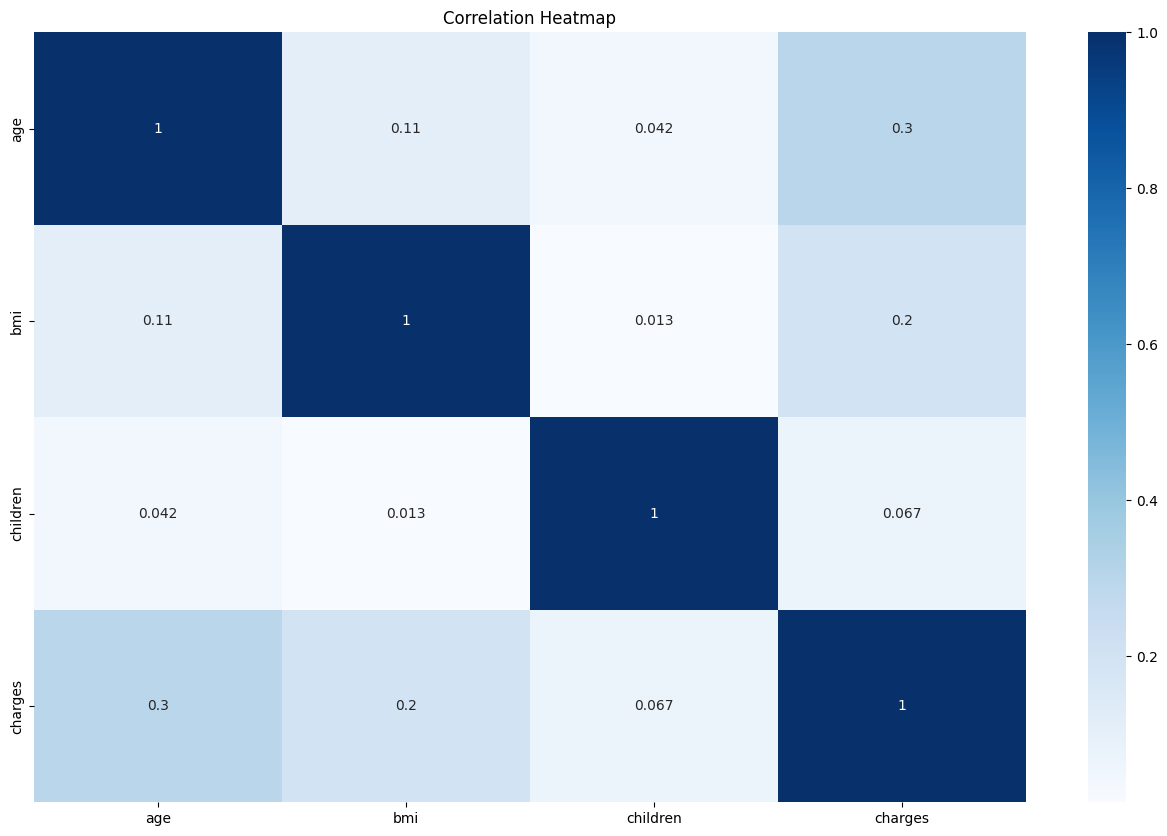

In [ ]:
# numerical columns 간 연관성
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

# numerical colums 중에는 age(0.3), bmi(0.2)가 charges와 연관성이 높은 편이다.
# categorical colums는 레이블 인코딩(string>float 변환)을 하더라도 연관성을 계산하기는 어렵다. (레이블을 치환한 숫자들의 크기가 해당 레이블의 중요성을 반영하지 않으므로)

## 레이블 인코딩 (categorical data -> numerical data)

In [ ]:
# label encoding (sex, smoker, region)
le = LabelEncoder()

for col in cat_features:
    df[col]=le.fit_transform(df[col])

df.head().style.background_gradient(cmap="YlGnBu")

# sex : female(0), male(1)
# smoker : no(0), yes(1)
# region : northeast(0), northwest(1), southeast(2), southwest(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900000,0,1,3,16884.924000
1,18,1,33.770000,1,0,2,1725.552300
2,28,1,33.000000,3,0,2,4449.462000
3,33,1,22.705000,0,0,1,21984.470610
4,32,1,28.880000,0,0,1,3866.855200


In [ ]:
# index column 추가
data = df.reset_index()

data.head().style.background_gradient(cmap="YlGnBu")

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900000,0,1,3,16884.924000
1,1,18,1,33.770000,1,0,2,1725.552300
2,2,28,1,33.000000,3,0,2,4449.462000
3,3,33,1,22.705000,0,0,1,21984.470610
4,4,32,1,28.880000,0,0,1,3866.855200


## 데이터 스플릿

In [ ]:
# data column 나누기 (원인-결과)

y = data['charges'] # 결과
X = data.drop(['charges','index'],axis=1) # 원인

cols = X.columns
cols

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# split data : train / test = 0.8:0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set :", len(X_train))
print("Testing set :", len(X_test))
print("Training target variable :", len(y_train))
print("Testing target variable :", len(y_test))

Training set : 1069
Testing set : 268
Training target variable : 1069
Testing target variable : 268


# Regression
회귀 모델을 사용하여 Charges 값 예측하기

## 선형 회귀 (Linear Regression)

Linear Regression Mean Squared Error: 35493102.61165051


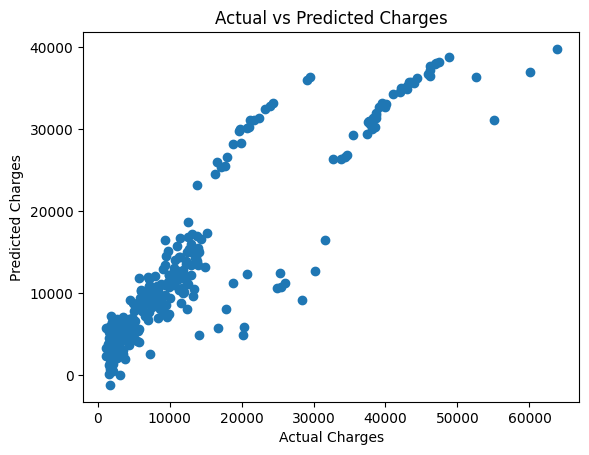

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 선형 회귀 모델 훈련
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 예측
y_pred_lr = lr_model.predict(X_test)

# 성능 평가
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression Mean Squared Error: {mse_lr}')

# 예측 결과 시각화
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

## 릿지 회귀 (Ridge Regression)

Ridge Regression Mean Squared Error: 35667170.64336926


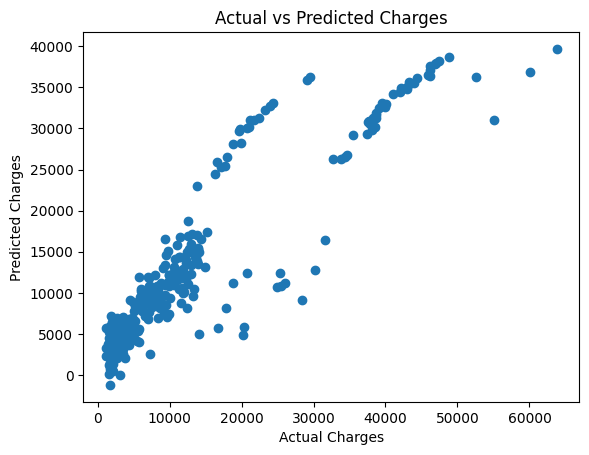

In [ ]:
from sklearn.linear_model import Ridge

# 릿지 회귀 모델 훈련
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 예측
y_pred_ridge = ridge_model.predict(X_test)

# 성능 평가
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression Mean Squared Error: {mse_ridge}')

# 예측 결과 시각화
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

## 라쏘 회귀(Lasso Regression)

Lasso Regression Mean Squared Error: 35494032.349558644


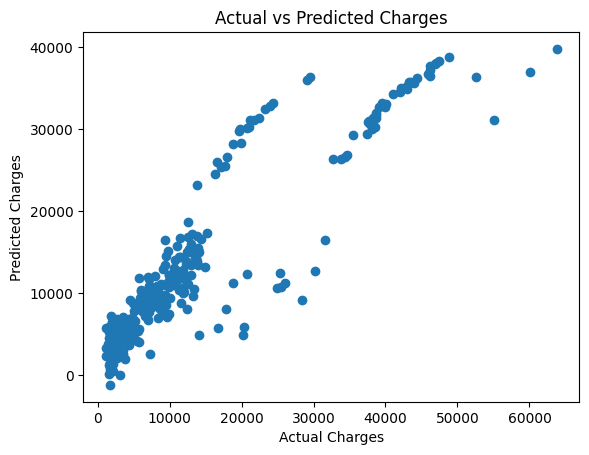

In [ ]:
from sklearn.linear_model import Lasso

# 라쏘 회귀 모델 훈련
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# 예측
y_pred_lasso = lasso_model.predict(X_test)

# 성능 평가
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression Mean Squared Error: {mse_lasso}')

# 예측 결과 시각화
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

## 랜덤 포레스트 회귀(Random Forest Regression)

Random Forest Regression Mean Squared Error: 21420846.45966618


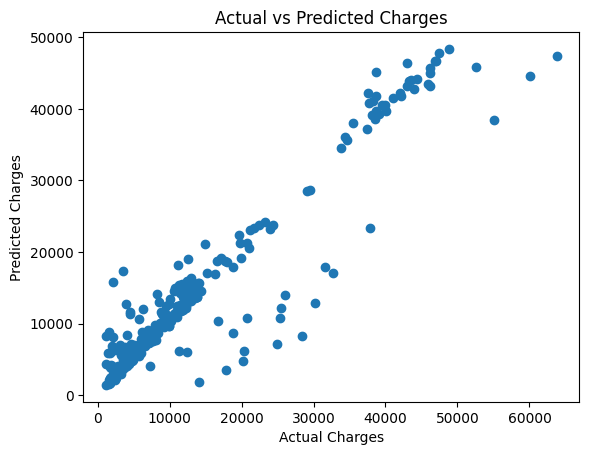

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 회귀 모델 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Regression Mean Squared Error: {mse_rf}')

# 예측 결과 시각화
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

## 그래디언트 부스팅 회귀(Gradient Boosting Regression)

Gradient Boosting Regression Mean Squared Error: 18170259.107231136


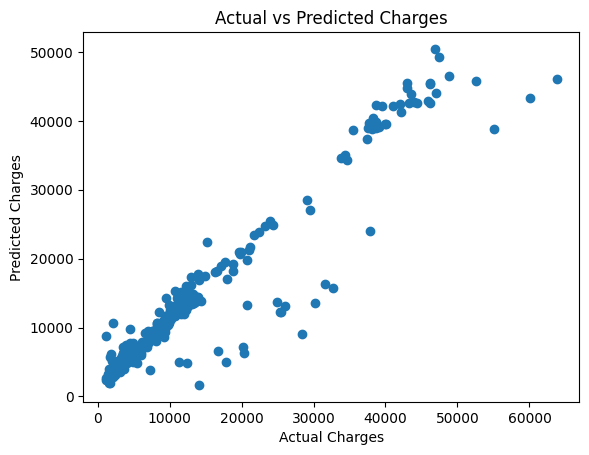

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# 그래디언트 부스팅 회귀 모델 훈련
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# 예측
y_pred_gb = gb_model.predict(X_test)

# 성능 평가
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Regression Mean Squared Error: {mse_gb}')

# 예측 결과 시각화
plt.scatter(y_test, y_pred_gb)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

## XGBoost

XGBoost Mean Squared Error: 24331646.20670241


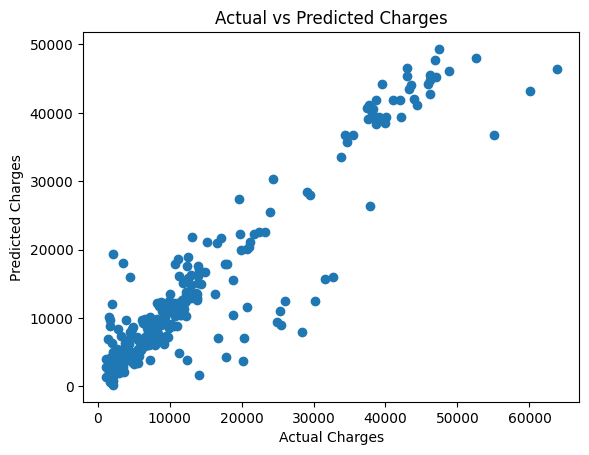

In [ ]:
import xgboost as xgb

# XGBoost 모델 훈련
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 성능 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {mse_xgb}')

# 예측 결과 시각화
plt.scatter(y_test, y_pred_xgb)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

## 모델 비교

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델 리스트
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# 성능 저장을 위한 리스트
model_names = ['linear','ridge','lasso','random','Gradient','XG']
mse_list = []
rmse_list = []
mae_list = []
r2_list = []

# 모델 훈련 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)  # 모델 학습
    y_pred = model.predict(X_test)  # 예측

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

    print(f'{name}:')
    print(f'  Mean Squared Error (MSE): {mse}')
    print(f'  Root Mean Squared Error (RMSE): {rmse}')
    print(f'  Mean Absolute Error (MAE): {mae}')
    print(f'  R² Score: {r2}')
    print()

    # 결과를 데이터프레임으로 저장
regression_results_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_list,
    'RMSE': rmse_list,
    'MAE': mae_list,
    'R2 Score': r2_list
})

print(regression_results_df)

Linear Regression:
  Mean Squared Error (MSE): 35493102.61165051
  Root Mean Squared Error (RMSE): 5957.608799816459
  Mean Absolute Error (MAE): 4182.353155288296
  R² Score: 0.8068466322629112

Ridge Regression:
  Mean Squared Error (MSE): 35667170.64336926
  Root Mean Squared Error (RMSE): 5972.1998160953435
  Mean Absolute Error (MAE): 4198.2028624130935
  R² Score: 0.8058993545084213

Lasso Regression:
  Mean Squared Error (MSE): 35494032.349558644
  Root Mean Squared Error (RMSE): 5957.686828758176
  Mean Absolute Error (MAE): 4182.423110402254
  R² Score: 0.8068415726317475

Random Forest:
  Mean Squared Error (MSE): 21420846.45966618
  Root Mean Squared Error (RMSE): 4628.2660316436195
  Mean Absolute Error (MAE): 2555.9294270283576
  R² Score: 0.8834278119122363

Gradient Boosting:
  Mean Squared Error (MSE): 18170259.107231136
  Root Mean Squared Error (RMSE): 4262.658689976379
  Mean Absolute Error (MAE): 2508.41811836199
  R² Score: 0.901117499430293

XGBoost:
  Mean Square

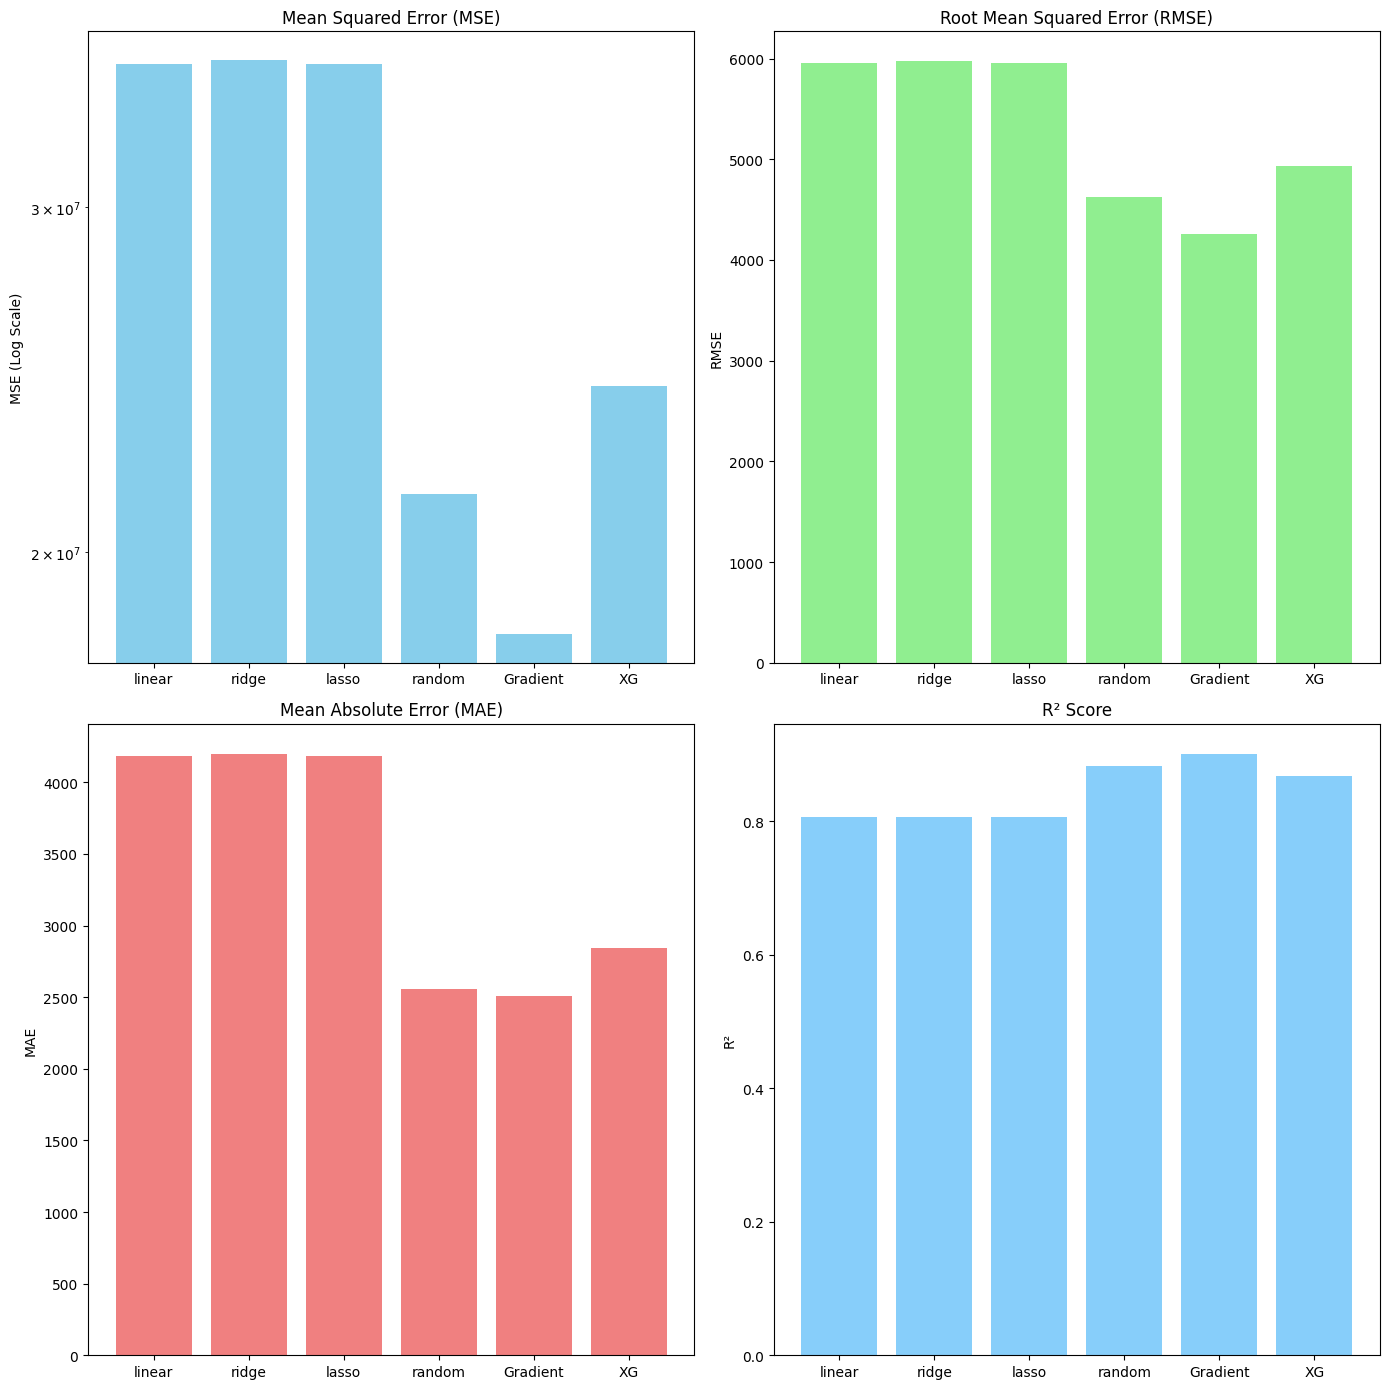

In [ ]:
# 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# MSE (로그 스케일 사용)
axes[0, 0].bar(model_names, mse_list, color='skyblue')
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].set_yscale('log')  # 로그 스케일
axes[0, 0].set_ylabel('MSE (Log Scale)')

# RMSE
axes[0, 1].bar(model_names, rmse_list, color='lightgreen')
axes[0, 1].set_title('Root Mean Squared Error (RMSE)')
axes[0, 1].set_ylabel('RMSE')

# MAE
axes[1, 0].bar(model_names, mae_list, color='lightcoral')
axes[1, 0].set_title('Mean Absolute Error (MAE)')
axes[1, 0].set_ylabel('MAE')

# R² Score
axes[1, 1].bar(model_names, r2_list, color='lightskyblue')
axes[1, 1].set_title('R² Score')
axes[1, 1].set_ylabel('R²')

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 가장 성능이 좋은 모델: Gradient Boosting

### Feature Importance 확인

In [ ]:
# 가장 성능이 좋은 모델을 선택 => Gradient Boosting
best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Feature Importance 확인
feature_importance = best_model.feature_importances_

# Feature Importance를 순위대로 나타내기
feature_importance_ranked = sorted(zip(feature_importance, X_train.columns), reverse=True)
for importance, feature in feature_importance_ranked:
    print(f"{feature}: {importance}")

smoker: 0.6709143170466134
bmi: 0.188440959726968
age: 0.12287076244893755
children: 0.012763821714206796
region: 0.003859842101419106
sex: 0.001150296961855103


### 실제 예측 결과 csv 파일에 저장

In [ ]:
# 전체 데이터셋에 대해 예측 수행 (index 포함한 원본 데이터 사용)
X_all = data.drop(['charges', 'index'], axis=1)
data['prediction_charges'] = best_model.predict(X_all)

# 예측 결과가 포함된 데이터프레임을 CSV 파일로 저장
data.to_csv('predicted_charges.csv', index=False)

print("CSV 파일로 저장되었습니다.")
print(data.head())

CSV 파일로 저장되었습니다.
   index  age  sex     bmi  children  smoker  region      charges  \
0      0   19    0  27.900         0       1       3  16884.92400   
1      1   18    1  33.770         1       0       2   1725.55230   
2      2   28    1  33.000         3       0       2   4449.46200   
3      3   33    1  22.705         0       0       1  21984.47061   
4      4   32    1  28.880         0       0       1   3866.85520   

   prediction_charges  
0        18672.794944  
1         3217.984497  
2         7597.687505  
3         5379.043289  
4         3946.493646  


# Binary Classification
regression으로만 예측하지 않고, classification을 수행하고자 함.

Charges 값을 High, Low으로 나누어 index column에 저장하고, index를 target으로 binary classification을 수행

## charges column을 High / Low로 분할

In [ ]:
# charges column을 변화율이 가장 큰 구간을 기준으로 'High' & 'Low' label로 나눈다.
p_df = pd.DataFrame(p_data)
hist, bin_edges = np.histogram(p_df['charges'], bins=32) # 히스토그램을 사용하여 데이터 분포를 확인 (37개 구간)
diff = np.diff(hist) # 구간 별 감소율
max_drop_index = np.argmin(diff) # 감소가 가장 큰 지점의 index 구하기
threshold = bin_edges[max_drop_index + 1] # 해당 구간의 경계 값

p_df['label'] = ['High' if x >= threshold else 'Low' for x in p_df['charges']] # 데이터를 두 그룹으로 나눔

p_df.head().style.background_gradient(cmap="YlGnBu")

,sex,smoker,region,age,bmi,children,charges,label
0,female,yes,southwest,19,27.900000,0,16884.924000,High
1,male,no,southeast,18,33.770000,1,1725.552300,Low
2,male,no,southeast,28,33.000000,3,4449.462000,Low
3,male,no,northwest,33,22.705000,0,21984.470610,High
4,male,no,northwest,32,28.880000,0,3866.855200,Low


In [ ]:
# 분할된 데이터 확인
label_counts = p_df['label'].value_counts()
label_counts

# High charges 965, Low charges 137로 약 9:1의 비율로 데이터가 나뉜다.

label
Low     969
High    223
Name: count, dtype: int64

In [ ]:
fig = px.histogram(p_df, x = 'charges', color = 'label')
fig.show()

## 레이블 인코딩 (categorical data -> numerical data)

In [ ]:
# label encoding (sex, smoker, region)
le = LabelEncoder()
cat_features = [col for col in p_df.columns if p_df[col].dtype=='O']
num_features = [col for col in p_df.columns if p_df[col].dtype!='O']

for col in cat_features:
    p_df[col]=le.fit_transform(p_df[col])

p_df.head().style.background_gradient(cmap="YlGnBu")

# sex : female(0), male(1)
# smoker : no(0), yes(1)
# region : northeast(0), northwest(1), southeast(2), southwest(3)
# label : High(0), Low(1)

,sex,smoker,region,age,bmi,children,charges,label
0,0,1,3,19,27.900000,0,16884.924000,0
1,1,0,2,18,33.770000,1,1725.552300,1
2,1,0,2,28,33.000000,3,4449.462000,1
3,1,0,1,33,22.705000,0,21984.470610,0
4,1,0,1,32,28.880000,0,3866.855200,1


In [ ]:
# index column 추가
data = p_df.reset_index()

data.head().style.background_gradient(cmap="YlGnBu")

,index,sex,smoker,region,age,bmi,children,charges,label
0,0,0,1,3,19,27.900000,0,16884.924000,0
1,1,1,0,2,18,33.770000,1,1725.552300,1
2,2,1,0,2,28,33.000000,3,4449.462000,1
3,3,1,0,1,33,22.705000,0,21984.470610,0
4,4,1,0,1,32,28.880000,0,3866.855200,1


## 데이터 스플릿

In [ ]:
# data column 나누기 (원인-결과)

y = data['label'] # 결과
X = data.drop(['charges','index', 'label'],axis=1) # 원인

cols = X.columns
cols

Index(['sex', 'smoker', 'region', 'age', 'bmi', 'children'], dtype='object')

In [ ]:
# split data (train : test = 0.8 : 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set :", len(X_train))
print("Testing set :", len(X_test))
print("Training target variable :", len(y_train))
print("Testing target variable :", len(y_test))

Training set : 953
Testing set : 239
Training target variable : 953
Testing target variable : 239


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# 성능 저장을 위한 리스트
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'K-Nearest Neighbors']
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# 모델 훈련 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)  # 모델 학습
    y_pred = model.predict(X_test)  # 예측

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print(f'{name}:')
    print(f'  Accuracy: {accuracy}')
    print(f'  Precision: {precision}')
    print(f'  Recall: {recall}')
    print(f'  F1 Score: {f1}')
    print()

# 결과를 데이터프레임으로 저장
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
})

print(results_df)

Logistic Regression:
  Accuracy: 0.895397489539749
  Precision: 0.8861386138613861
  Recall: 0.988950276243094
  F1 Score: 0.9347258485639687

Decision Tree:
  Accuracy: 0.8451882845188284
  Precision: 0.8913043478260869
  Recall: 0.9060773480662984
  F1 Score: 0.8986301369863015

Random Forest:
  Accuracy: 0.9037656903765691
  Precision: 0.895
  Recall: 0.988950276243094
  F1 Score: 0.9396325459317585

SVM:
  Accuracy: 0.7573221757322176
  Precision: 0.7573221757322176
  Recall: 1.0
  F1 Score: 0.861904761904762

K-Nearest Neighbors:
  Accuracy: 0.7698744769874477
  Precision: 0.7763157894736842
  Recall: 0.9779005524861878
  F1 Score: 0.8655256723716381

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.895397   0.886139  0.988950  0.934726
1        Decision Tree  0.845188   0.891304  0.906077  0.898630
2        Random Forest  0.903766   0.895000  0.988950  0.939633
3                  SVM  0.757322   0.757322  1.000000  0.861905
4  K-Nearest Ne

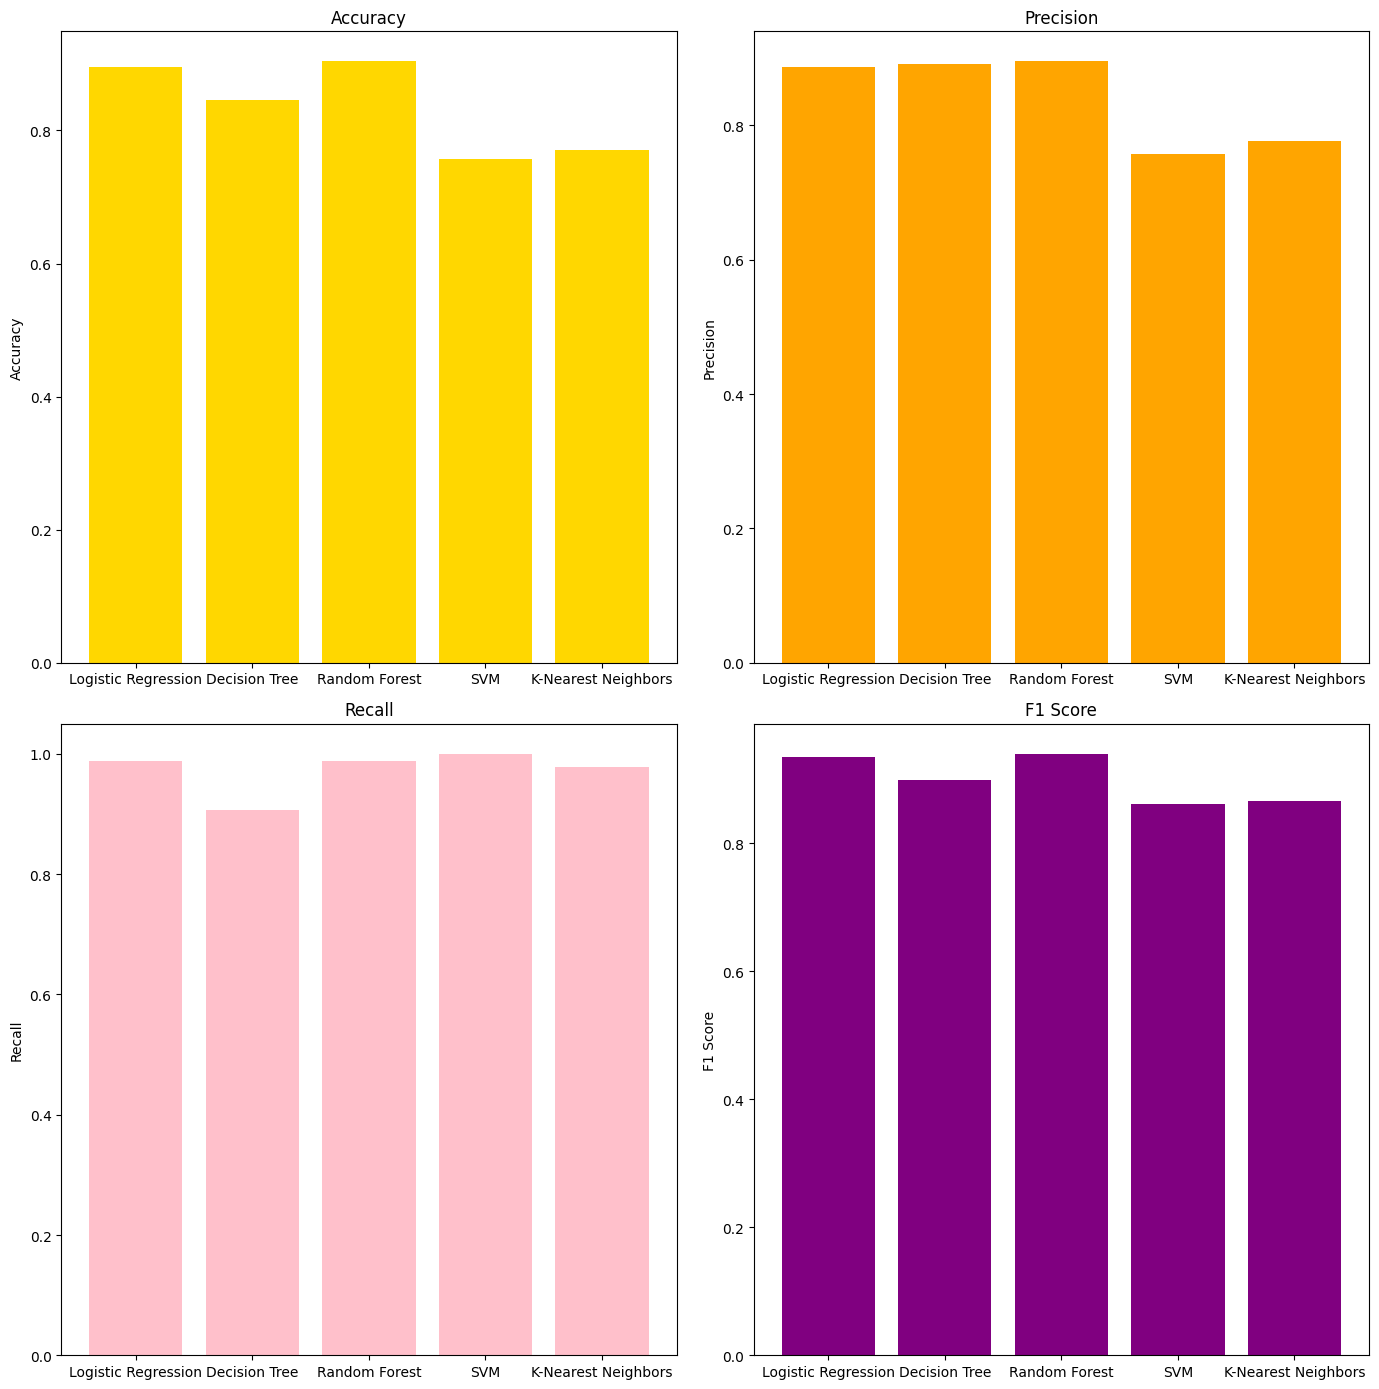

In [ ]:
# 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Accuracy
axes[0, 0].bar(model_names, accuracy_list, color='gold')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylabel('Accuracy')

# Precision
axes[0, 1].bar(model_names, precision_list, color='orange')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylabel('Precision')

# Recall
axes[1, 0].bar(model_names, recall_list, color='pink')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylabel('Recall')

# F1 Score
axes[1, 1].bar(model_names, f1_list, color='purple')
axes[1, 1].set_title('F1 Score')
axes[1, 1].set_ylabel('F1 Score')

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 가장 성능이 좋은 모델: RandomForest

### Feature Importance 확인

In [ ]:
# 가장 성능이 좋은 모델을 선택 => RandomForest
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Feature Importance 확인
feature_importance = best_model.feature_importances_

# Feature Importance를 순위대로 나타내기
feature_importance_ranked = sorted(zip(feature_importance, X_train.columns), reverse=True)
for importance, feature in feature_importance_ranked:
    print(f"{feature}: {importance}")

smoker: 0.4829974565260843
bmi: 0.21519401748621855
age: 0.1836707425364386
children: 0.06010553360356189
region: 0.03812158569489455
sex: 0.019910664152802182


### 실제 예측 결과 csv 파일에 저장

In [ ]:
# 전체 데이터셋에 대해 예측 수행 (index 포함한 원본 데이터 사용)
X_all = data.drop(['charges', 'index', 'label'], axis=1)
data['prediction_charges'] = best_model.predict(X_all)

# 예측 결과가 포함된 데이터프레임을 CSV 파일로 저장
data.to_csv('predicted_charges_label.csv', index=False)

print("CSV 파일로 저장되었습니다.")
print(data.head())

CSV 파일로 저장되었습니다.
   index  sex  smoker  region  age     bmi  children      charges  label  \
0      0    0       1       3   19  27.900         0  16884.92400      0   
1      1    1       0       2   18  33.770         1   1725.55230      1   
2      2    1       0       2   28  33.000         3   4449.46200      1   
3      3    1       0       1   33  22.705         0  21984.47061      0   
4      4    1       0       1   32  28.880         0   3866.85520      1   

   prediction_charges  
0                   0  
1                   1  
2                   1  
3                   0  
4                   1  
